In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
#import the data:
df1 = pd.read_csv('labs.csv')
print(df1.shape)
df2 = pd.read_csv('examination.csv')
print(df2.shape)
df3 = pd.read_csv('questionnaire.csv')
print(df3.shape)
df4 = pd.read_csv('demographic.csv')
print(df4.shape)

(9813, 424)
(9813, 224)
(10175, 953)
(10175, 47)


In [3]:
#Feature selection: 
filter_exam = ['SEQN','BMXWT','BMXHT']
filter_ques = ['DIQ010'] #'DID040','RHQ162' : age when learn to have diabetes / answer when pregrancy
filter_demo = ['RIAGENDR','RIDAGEYR']
filter_labUR = [col for col in df1 if col.startswith('UR')]

In [4]:
#DataSet creation:
df_labUR = df1[filter_labUR]  #all urine analysis
df_exam = df2[filter_exam] #Weight-heigh, 
df_exam = df_exam.rename(columns = {'SEQN' : 'ID','BMXWT' : 'Weight','BMXHT' : 'Height'})
df_ques = df3[filter_ques] #Answer to the diabetes, plus same question during pregnancy
df_demo = df4[filter_demo] #Gender, age
df_demo = df_demo.rename(columns = {'RIAGENDR' : 'Gender','RIDAGEYR' : 'Age'})                        

In [5]:
#Feature cleaning, 

In [6]:
#Feature processsing: NaN, Index, other
df_ques['DIQ010'].value_counts()
df_ques.loc[df_ques['DIQ010'] == 2.0, 'Diabetes'] = 0
df_ques.loc[df_ques['DIQ010'] == 1.0, 'Diabetes'] = 1 #diabetes
df_ques.loc[df_ques['DIQ010'] == 3.0, 'Diabetes'] = 1 #high risk concerdered as diabetes for a first study
df_ques.drop(['DIQ010'],axis=1, inplace = True);

c:\python27\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\python27\lib\site-packages\pandas\core\indexing.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(new_indexer, value)
c:\python27\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(ind

In [7]:
df_ques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 1 columns):
Diabetes    9763 non-null float64
dtypes: float64(1)
memory usage: 79.6 KB


In [8]:
df_labUR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 128 entries, URXUMA to URXUAS
dtypes: float64(128)
memory usage: 9.6 MB


In [9]:
df_labUR.dropna(thresh=7000,axis=1, inplace=True) #Keep the feature that have at least half the data (gurai)
#df_labUR.drop('URXUTRI',axis=1,inplace=True)
for col in df_labUR:
    df_labUR[col].fillna(df_labUR[col].std(),inplace=True)

c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python27\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
#filling:
for col in df_exam:
    df_exam[col].fillna(df_exam[col].mean(),inplace=True)
for col in df_demo:
    df_demo[col].fillna(df_demo[col].median(), inplace=True)

In [11]:
df_exam['Ratio']=df_exam['Weight']/df_exam['Height']

In [12]:
df = pd.concat([df_exam, df_demo], axis=1, join='inner')
df = pd.concat([df, df_labUR], axis=1, join='inner')
df = pd.concat([df, df_ques], axis=1, join='inner')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 14 columns):
ID          9813 non-null int64
Weight      9813 non-null float64
Height      9813 non-null float64
Ratio       9813 non-null float64
Gender      9813 non-null int64
Age         9813 non-null int64
URXUMA      9813 non-null float64
URXUMS      9813 non-null float64
URXUCR.x    9813 non-null float64
URXCRS      9813 non-null float64
URDACT      9813 non-null float64
URXVOL1     9813 non-null float64
URDFLOW1    9813 non-null float64
Diabetes    9416 non-null float64
dtypes: float64(11), int64(3)
memory usage: 1.0 MB


In [14]:
#Drop some of the non encoded diabetes (didn't answer or so)
df['Diabetes'].fillna('NaN')
df.dropna(how='any',axis=0,inplace=True)

In [15]:
#df.drop(['ID'],axis=1,inplace=True)
df.drop(['ID','Age','Gender','Height','Weight'],axis=1,inplace=True)

In [16]:
df.shape

(9416, 9)

In [17]:
#Data for training
from sklearn.model_selection import train_test_split
y=df['Diabetes']
X=df.drop('Diabetes',axis=1)

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
X_resampled, y_resampled = SMOTE(kind='borderline2').fit_sample(X, y)

In [20]:
YR=pd.Series(y_resampled)
XR=pd.DataFrame(X_resampled)

In [21]:
YR.shape
XR.shape

(17405, 8)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(XR,YR,random_state=0)

In [23]:
X_train.shape

(13053, 8)

In [24]:
#Model creation:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15, max_depth=None, min_samples_split=4, random_state=0)

In [25]:
#Training
clf = clf.fit(X_train, y_train)

In [26]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(clf, X_test, y_test)  

c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


        Test  Random F
0    Logloss  7.603049
1   F1 Score  0.770813
2  Precision  0.799504
3   Accuracy  0.779871
4    ROC AUC  0.846403
Axes(0.08,0.125;0.87x0.755)


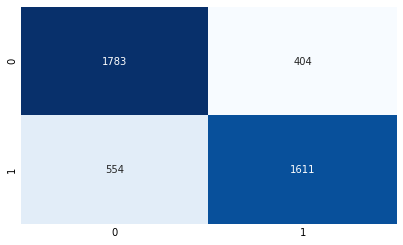

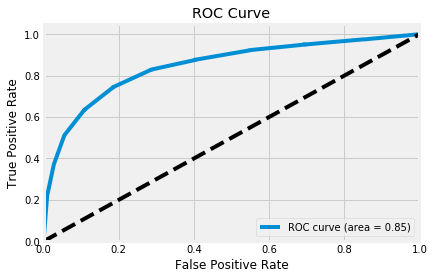

In [27]:
from sklearn.metrics import log_loss, f1_score, precision_score, accuracy_score, confusion_matrix, roc_curve, auc
yrdn_pre=clf.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

Result=pd.DataFrame()
Result['Test']=["Logloss","F1 Score","Precision","Accuracy", 'ROC AUC']
Result['Random F']=[log_loss(y_test,yrdn_pre),
                 f1_score(y_test,yrdn_pre),
                 precision_score(y_test,yrdn_pre),
                 accuracy_score(y_test,yrdn_pre),
                 roc_auc
                ]
print(Result)
print(sns.heatmap(confusion_matrix(y_test,yrdn_pre),annot=True,fmt="d",cbar=False,cmap='Blues'))

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
imp=clf.feature_importances_
feature=X.columns
tableFEAT=pd.DataFrame()
tableFEAT['Feature Name']=feature
tableFEAT['Score']=imp
tableFEAT.sort_values('Score',ascending=False,inplace=True)
print("Random Forest:")
tableFEAT


Random Forest:


,Feature Name,Score
0,Ratio,0.251827
7,URDFLOW1,0.118181
6,URXVOL1,0.109737
5,URDACT,0.108190
3,URXUCR.x,0.105372
2,URXUMS,0.103515
4,URXCRS,0.103065
1,URXUMA,0.100113


In [29]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=1500,
                           learning_rate=0.02,
                           depth=2,
                           loss_function='Logloss',
                           #od_wait=50,
                           verbose=True,
                          )

c:\python27\lib\site-packages\catboost\core.py:1252: FutureWarning: The 'verbose' parameter is deprecated, use 'logging_level' parameter instead (posible values: 'Silent', 'Verbose', 'Info', 'Debug').
  super(CatBoostClassifier, self).__init__(params)


In [30]:
model.fit(X_train, y_train)

0:	learn: 0.6925770	total: 134ms	remaining: 3m 21s
1:	learn: 0.6918781	total: 194ms	remaining: 2m 25s
2:	learn: 0.6912185	total: 266ms	remaining: 2m 12s
3:	learn: 0.6906888	total: 330ms	remaining: 2m 3s
4:	learn: 0.6901325	total: 409ms	remaining: 2m 2s
5:	learn: 0.6895053	total: 461ms	remaining: 1m 54s
6:	learn: 0.6888892	total: 510ms	remaining: 1m 48s
7:	learn: 0.6884145	total: 569ms	remaining: 1m 46s
8:	learn: 0.6878665	total: 625ms	remaining: 1m 43s
9:	learn: 0.6873659	total: 684ms	remaining: 1m 41s
10:	learn: 0.6868708	total: 735ms	remaining: 1m 39s
11:	learn: 0.6863945	total: 785ms	remaining: 1m 37s
12:	learn: 0.6859630	total: 826ms	remaining: 1m 34s
13:	learn: 0.6854951	total: 888ms	remaining: 1m 34s
14:	learn: 0.6849923	total: 935ms	remaining: 1m 32s
15:	learn: 0.6845272	total: 976ms	remaining: 1m 30s
16:	learn: 0.6840591	total: 1.02s	remaining: 1m 29s
17:	learn: 0.6836848	total: 1.07s	remaining: 1m 27s
18:	learn: 0.6832055	total: 1.12s	remaining: 1m 27s
19:	learn: 0.6827433	tot

160:	learn: 0.6517887	total: 8.44s	remaining: 1m 10s
161:	learn: 0.6515707	total: 8.48s	remaining: 1m 10s
162:	learn: 0.6515110	total: 8.53s	remaining: 1m 9s
163:	learn: 0.6513917	total: 8.58s	remaining: 1m 9s
164:	learn: 0.6512629	total: 8.63s	remaining: 1m 9s
165:	learn: 0.6511645	total: 8.69s	remaining: 1m 9s
166:	learn: 0.6509396	total: 8.74s	remaining: 1m 9s
167:	learn: 0.6508482	total: 8.79s	remaining: 1m 9s
168:	learn: 0.6507559	total: 8.84s	remaining: 1m 9s
169:	learn: 0.6506352	total: 8.88s	remaining: 1m 9s
170:	learn: 0.6505301	total: 8.94s	remaining: 1m 9s
171:	learn: 0.6504363	total: 8.99s	remaining: 1m 9s
172:	learn: 0.6503339	total: 9.04s	remaining: 1m 9s
173:	learn: 0.6502745	total: 9.09s	remaining: 1m 9s
174:	learn: 0.6499411	total: 9.14s	remaining: 1m 9s
175:	learn: 0.6498571	total: 9.19s	remaining: 1m 9s
176:	learn: 0.6497247	total: 9.24s	remaining: 1m 9s
177:	learn: 0.6496455	total: 9.29s	remaining: 1m 9s
178:	learn: 0.6495495	total: 9.34s	remaining: 1m 8s
179:	learn

321:	learn: 0.6353403	total: 17.2s	remaining: 1m 2s
322:	learn: 0.6352943	total: 17.3s	remaining: 1m 2s
323:	learn: 0.6350328	total: 17.3s	remaining: 1m 2s
324:	learn: 0.6349713	total: 17.4s	remaining: 1m 2s
325:	learn: 0.6349275	total: 17.4s	remaining: 1m 2s
326:	learn: 0.6347943	total: 17.5s	remaining: 1m 2s
327:	learn: 0.6347452	total: 17.6s	remaining: 1m 2s
328:	learn: 0.6345936	total: 17.6s	remaining: 1m 2s
329:	learn: 0.6345039	total: 17.7s	remaining: 1m 2s
330:	learn: 0.6344043	total: 17.8s	remaining: 1m 2s
331:	learn: 0.6342003	total: 17.8s	remaining: 1m 2s
332:	learn: 0.6341316	total: 17.9s	remaining: 1m 2s
333:	learn: 0.6340444	total: 17.9s	remaining: 1m 2s
334:	learn: 0.6339847	total: 18s	remaining: 1m 2s
335:	learn: 0.6339044	total: 18.1s	remaining: 1m 2s
336:	learn: 0.6338216	total: 18.1s	remaining: 1m 2s
337:	learn: 0.6337597	total: 18.2s	remaining: 1m 2s
338:	learn: 0.6336268	total: 18.2s	remaining: 1m 2s
339:	learn: 0.6335994	total: 18.3s	remaining: 1m 2s
340:	learn: 0.

483:	learn: 0.6250317	total: 26.5s	remaining: 55.6s
484:	learn: 0.6249119	total: 26.6s	remaining: 55.6s
485:	learn: 0.6248754	total: 26.6s	remaining: 55.6s
486:	learn: 0.6248254	total: 26.7s	remaining: 55.5s
487:	learn: 0.6247703	total: 26.8s	remaining: 55.5s
488:	learn: 0.6247314	total: 26.8s	remaining: 55.5s
489:	learn: 0.6246631	total: 26.9s	remaining: 55.4s
490:	learn: 0.6246375	total: 26.9s	remaining: 55.3s
491:	learn: 0.6245417	total: 27s	remaining: 55.3s
492:	learn: 0.6244919	total: 27.1s	remaining: 55.3s
493:	learn: 0.6243991	total: 27.1s	remaining: 55.2s
494:	learn: 0.6243072	total: 27.1s	remaining: 55.1s
495:	learn: 0.6242697	total: 27.2s	remaining: 55.1s
496:	learn: 0.6241806	total: 27.2s	remaining: 55s
497:	learn: 0.6241077	total: 27.3s	remaining: 54.9s
498:	learn: 0.6240566	total: 27.3s	remaining: 54.9s
499:	learn: 0.6239905	total: 27.4s	remaining: 54.8s
500:	learn: 0.6239087	total: 27.4s	remaining: 54.7s
501:	learn: 0.6238425	total: 27.5s	remaining: 54.7s
502:	learn: 0.62

643:	learn: 0.6170770	total: 34.7s	remaining: 46.1s
644:	learn: 0.6170439	total: 34.8s	remaining: 46.1s
645:	learn: 0.6170272	total: 34.8s	remaining: 46s
646:	learn: 0.6169828	total: 34.9s	remaining: 46s
647:	learn: 0.6169524	total: 34.9s	remaining: 45.9s
648:	learn: 0.6168720	total: 35s	remaining: 45.8s
649:	learn: 0.6168457	total: 35s	remaining: 45.8s
650:	learn: 0.6168068	total: 35s	remaining: 45.7s
651:	learn: 0.6167476	total: 35.1s	remaining: 45.6s
652:	learn: 0.6166808	total: 35.1s	remaining: 45.6s
653:	learn: 0.6166189	total: 35.2s	remaining: 45.5s
654:	learn: 0.6166083	total: 35.3s	remaining: 45.5s
655:	learn: 0.6165603	total: 35.3s	remaining: 45.4s
656:	learn: 0.6165401	total: 35.3s	remaining: 45.3s
657:	learn: 0.6165055	total: 35.4s	remaining: 45.3s
658:	learn: 0.6164699	total: 35.4s	remaining: 45.2s
659:	learn: 0.6164421	total: 35.5s	remaining: 45.2s
660:	learn: 0.6164216	total: 35.5s	remaining: 45.1s
661:	learn: 0.6164078	total: 35.6s	remaining: 45s
662:	learn: 0.6163629	to

806:	learn: 0.6113727	total: 42.7s	remaining: 36.6s
807:	learn: 0.6113475	total: 42.7s	remaining: 36.6s
808:	learn: 0.6113097	total: 42.8s	remaining: 36.5s
809:	learn: 0.6112917	total: 42.8s	remaining: 36.5s
810:	learn: 0.6112792	total: 42.9s	remaining: 36.4s
811:	learn: 0.6112573	total: 42.9s	remaining: 36.4s
812:	learn: 0.6112354	total: 43s	remaining: 36.3s
813:	learn: 0.6111897	total: 43s	remaining: 36.2s
814:	learn: 0.6111672	total: 43.1s	remaining: 36.2s
815:	learn: 0.6111416	total: 43.1s	remaining: 36.1s
816:	learn: 0.6111160	total: 43.2s	remaining: 36.1s
817:	learn: 0.6110976	total: 43.2s	remaining: 36s
818:	learn: 0.6110768	total: 43.3s	remaining: 36s
819:	learn: 0.6110613	total: 43.3s	remaining: 35.9s
820:	learn: 0.6110402	total: 43.3s	remaining: 35.8s
821:	learn: 0.6110095	total: 43.4s	remaining: 35.8s
822:	learn: 0.6109828	total: 43.4s	remaining: 35.7s
823:	learn: 0.6109784	total: 43.5s	remaining: 35.7s
824:	learn: 0.6109587	total: 43.5s	remaining: 35.6s
825:	learn: 0.610932

966:	learn: 0.6071319	total: 50.9s	remaining: 28.1s
967:	learn: 0.6071065	total: 51s	remaining: 28s
968:	learn: 0.6070643	total: 51.1s	remaining: 28s
969:	learn: 0.6070134	total: 51.1s	remaining: 27.9s
970:	learn: 0.6070011	total: 51.2s	remaining: 27.9s
971:	learn: 0.6069872	total: 51.2s	remaining: 27.8s
972:	learn: 0.6069748	total: 51.3s	remaining: 27.8s
973:	learn: 0.6069525	total: 51.4s	remaining: 27.7s
974:	learn: 0.6069311	total: 51.4s	remaining: 27.7s
975:	learn: 0.6069205	total: 51.5s	remaining: 27.6s
976:	learn: 0.6068955	total: 51.5s	remaining: 27.6s
977:	learn: 0.6068530	total: 51.6s	remaining: 27.5s
978:	learn: 0.6068225	total: 51.6s	remaining: 27.5s
979:	learn: 0.6067994	total: 51.7s	remaining: 27.4s
980:	learn: 0.6067605	total: 51.8s	remaining: 27.4s
981:	learn: 0.6067276	total: 51.8s	remaining: 27.3s
982:	learn: 0.6066983	total: 51.8s	remaining: 27.3s
983:	learn: 0.6066811	total: 51.9s	remaining: 27.2s
984:	learn: 0.6066671	total: 51.9s	remaining: 27.2s
985:	learn: 0.6066

1124:	learn: 0.6034890	total: 59s	remaining: 19.7s
1125:	learn: 0.6034650	total: 59.1s	remaining: 19.6s
1126:	learn: 0.6034343	total: 59.1s	remaining: 19.6s
1127:	learn: 0.6034160	total: 59.2s	remaining: 19.5s
1128:	learn: 0.6033923	total: 59.2s	remaining: 19.5s
1129:	learn: 0.6033766	total: 59.3s	remaining: 19.4s
1130:	learn: 0.6033568	total: 59.3s	remaining: 19.4s
1131:	learn: 0.6033407	total: 59.4s	remaining: 19.3s
1132:	learn: 0.6033354	total: 59.4s	remaining: 19.2s
1133:	learn: 0.6033015	total: 59.5s	remaining: 19.2s
1134:	learn: 0.6032709	total: 59.5s	remaining: 19.1s
1135:	learn: 0.6032522	total: 59.6s	remaining: 19.1s
1136:	learn: 0.6032381	total: 59.6s	remaining: 19s
1137:	learn: 0.6032330	total: 59.7s	remaining: 19s
1138:	learn: 0.6032191	total: 59.7s	remaining: 18.9s
1139:	learn: 0.6032081	total: 59.8s	remaining: 18.9s
1140:	learn: 0.6031801	total: 59.8s	remaining: 18.8s
1141:	learn: 0.6031603	total: 59.9s	remaining: 18.8s
1142:	learn: 0.6031467	total: 59.9s	remaining: 18.7s

1285:	learn: 0.6003407	total: 1m 7s	remaining: 11.2s
1286:	learn: 0.6003193	total: 1m 7s	remaining: 11.1s
1287:	learn: 0.6002843	total: 1m 7s	remaining: 11s
1288:	learn: 0.6002702	total: 1m 7s	remaining: 11s
1289:	learn: 0.6002567	total: 1m 7s	remaining: 10.9s
1290:	learn: 0.6002363	total: 1m 7s	remaining: 10.9s
1291:	learn: 0.6002341	total: 1m 7s	remaining: 10.8s
1292:	learn: 0.6002221	total: 1m 7s	remaining: 10.8s
1293:	learn: 0.6002098	total: 1m 7s	remaining: 10.7s
1294:	learn: 0.6001997	total: 1m 7s	remaining: 10.7s
1295:	learn: 0.6001717	total: 1m 7s	remaining: 10.6s
1296:	learn: 0.6001603	total: 1m 7s	remaining: 10.6s
1297:	learn: 0.6001505	total: 1m 7s	remaining: 10.5s
1298:	learn: 0.6001034	total: 1m 7s	remaining: 10.5s
1299:	learn: 0.6000726	total: 1m 7s	remaining: 10.4s
1300:	learn: 0.6000559	total: 1m 7s	remaining: 10.4s
1301:	learn: 0.6000323	total: 1m 7s	remaining: 10.3s
1302:	learn: 0.6000095	total: 1m 7s	remaining: 10.3s
1303:	learn: 0.5999991	total: 1m 7s	remaining: 10.

1439:	learn: 0.5973957	total: 1m 14s	remaining: 3.1s
1440:	learn: 0.5973926	total: 1m 14s	remaining: 3.05s
1441:	learn: 0.5973755	total: 1m 14s	remaining: 3s
1442:	learn: 0.5973548	total: 1m 14s	remaining: 2.95s
1443:	learn: 0.5973449	total: 1m 14s	remaining: 2.9s
1444:	learn: 0.5973281	total: 1m 14s	remaining: 2.85s
1445:	learn: 0.5973055	total: 1m 14s	remaining: 2.79s
1446:	learn: 0.5972768	total: 1m 14s	remaining: 2.74s
1447:	learn: 0.5972539	total: 1m 14s	remaining: 2.69s
1448:	learn: 0.5972473	total: 1m 14s	remaining: 2.64s
1449:	learn: 0.5972427	total: 1m 15s	remaining: 2.59s
1450:	learn: 0.5972297	total: 1m 15s	remaining: 2.53s
1451:	learn: 0.5972078	total: 1m 15s	remaining: 2.48s
1452:	learn: 0.5971927	total: 1m 15s	remaining: 2.43s
1453:	learn: 0.5971799	total: 1m 15s	remaining: 2.38s
1454:	learn: 0.5971532	total: 1m 15s	remaining: 2.33s
1455:	learn: 0.5971407	total: 1m 15s	remaining: 2.27s
1456:	learn: 0.5971328	total: 1m 15s	remaining: 2.22s
1457:	learn: 0.5970925	total: 1m 

In [31]:
#Scoring
ycat_pre=model.predict(X_test)
len(ycat_pre)

4352

        Test  Random F   Catboost
0    Logloss  7.603049  11.555410
1   F1 Score  0.770813   0.682512
2  Precision  0.799504   0.646427
3   Accuracy  0.779871   0.665441
4    ROC AUC  0.846403   0.729388
Axes(0.08,0.125;0.87x0.755)


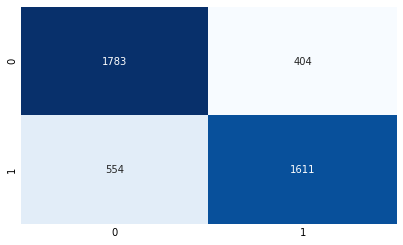

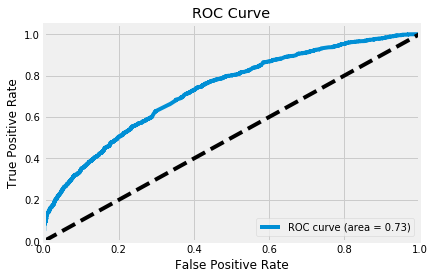

In [32]:
from sklearn.metrics import log_loss, f1_score, precision_score, accuracy_score, confusion_matrix, roc_curve, auc
yrdn_pre=clf.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

Result['Catboost']=[log_loss(y_test,ycat_pre),
                 f1_score(y_test,ycat_pre),
                 precision_score(y_test,ycat_pre),
                 accuracy_score(y_test,ycat_pre),
                 roc_auc
                ]
print(Result)
print(sns.heatmap(confusion_matrix(y_test,yrdn_pre),annot=True,fmt="d",cbar=False,cmap='Blues'))

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

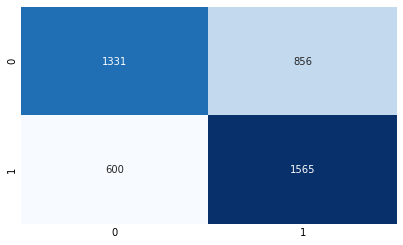

In [33]:
sns.heatmap(confusion_matrix(y_test,ycat_pre),annot=True,fmt="d",cbar=False,cmap='Blues')

In [34]:
imp=model.get_feature_importance(XR,YR)
feature=X.columns
tableFEAT=pd.DataFrame()
tableFEAT['Feature Name']=feature
tableFEAT['Score']=imp
tableFEAT.sort_values('Score',ascending=False,inplace=True)
tableFEAT

,Feature Name,Score
7,URDFLOW1,24.032889
2,URXUMS,16.418217
1,URXUMA,14.182717
0,Ratio,13.322698
5,URDACT,13.196478
6,URXVOL1,7.693774
4,URXCRS,6.175988
3,URXUCR.x,4.977237


In [35]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

        Test  Random F   Catboost       KNN
0    Logloss  7.603049  11.555410  8.682402
1   F1 Score  0.770813   0.682512  0.740881
2  Precision  0.799504   0.646427  0.760331
3   Accuracy  0.779871   0.665441  0.748621
4    ROC AUC  0.846403   0.729388  0.802299


Axes(0.08,0.125;0.87x0.755)


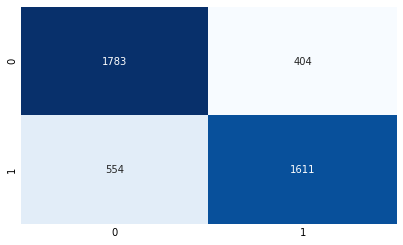

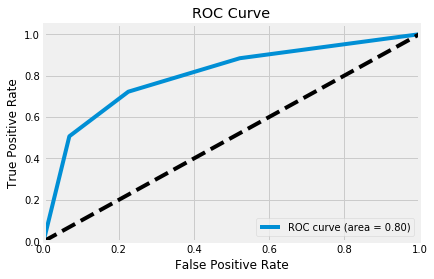

In [37]:
from sklearn.metrics import log_loss, f1_score, precision_score, accuracy_score, confusion_matrix, roc_curve, auc
yknn=knn.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
Result['KNN']=[log_loss(y_test,yknn),
                 f1_score(y_test,yknn),
                 precision_score(y_test,yknn),
                 accuracy_score(y_test,yknn),
                 roc_auc
                ]
print(Result)
print('\n')
print(sns.heatmap(confusion_matrix(y_test,yrdn_pre),annot=True,fmt="d",cbar=False,cmap='Blues'))

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [38]:
knn.get_f

AttributeError: 'KNeighborsClassifier' object has no attribute 'get_f'